In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv('./Train.csv').values

In [38]:
type(df)

numpy.ndarray

In [39]:
x=df[:,0:5]

In [40]:
y=df[:,5:6]

In [60]:
y.shape

(1600,)

In [41]:
x.shape

(1600, 5)

In [42]:
ones = np.ones([x.shape[0],1])
x = np.concatenate((ones,x),axis=1)

In [43]:
#  First column should be ones bcoz we need to consider the bias term as well.
#  If we dont take 1 columns, we would get only 5 thetas. but we want thetas + bias. Therefore this coulmn is useful
x.shape

(1600, 6)

In [44]:
y = y.reshape(-1,)

In [59]:
y.shape

(1600,)

In [45]:
def hypothesis(x,theta):
    #return theta[1]*x + theta[0]
    return np.dot(x,theta)
    
def gradient(x,y,theta):
     
    grad = np.zeros(x.shape[1],)
    m = x.shape[0]
    thetas=[]
    
    
    
    for i in range(x.shape[1]):
           
        for j in range(m):
            hx= hypothesis(x[j],theta) # Calculate hypothesis for all examples
            grad[i] += (hx-y[j])*x[j][i] 
#             thetas.append(grad[i]/m) # Not required to use thetas directly return grad
            
    return grad

#for i in range(m):
#        hx = hypothesis(x[i],theta)
#        grad[1] += (hx-y[i])*x[i]
#        grad[0] += (hx-y[i])

 #   return grad/m
#


def error(x,y,theta):
    
    e = 0
    for i in range(x.shape[0]):
        e += (y[i] - hypothesis(x[i],theta))**2
    
    #print(type(e))
    return 0.5*e/x.shape[0]

def gradientDescent(x,y,lr=0.0001, threshold=0.001):
    theta = np.zeros(x.shape[1],)
    error_list = []
    # Homework - define converge criteria to break the loop
    # Change in error < threshold
    
    for i in range(300): 
        grad = gradient(x,y,theta)
        e = error(x,y,theta)
        error_list.append(e)
        #upperlimit=5(val)
        val=x.shape[1]
        for j in range(val):
            theta[j]=theta[j]-lr*grad[j]
        
    return theta,error_list

In [46]:
theta,err= gradientDescent(x,y)

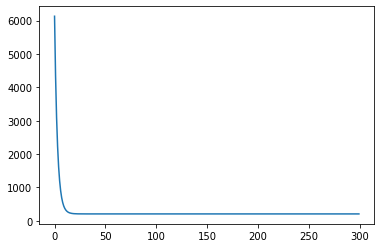

In [47]:
#  Error is decreasing now :-)
plt.plot(err)

In [48]:
xtest=pd.read_csv('./Test.csv').values

In [49]:
# Add ones to test array also
ones = np.ones([xtest.shape[0],1])
xtest = np.concatenate((ones,xtest),axis=1)

In [50]:

xtest.shape

(400, 6)

In [51]:

ans=hypothesis(xtest,theta)

In [52]:
print(ans.shape)

(400,)


In [53]:
ans = (ans).astype("int")

In [58]:
ans

array([ 114,  118,  -21,  -43,  -95,  -44,  -75,   23,  173,  172, -105,
        -20,   -3,  122,   40,   45, -189,   22,   11,  136,   64,  -61,
       -108,   -7,  -58,   11,   29,  107,   24,  -26,  110,  -44,  216,
        -13, -228,  154,   -2,   12, -308,   77,  -81, -206, -238,  134,
        -73,  105,   -3,   20,  -98,  -27,   10, -174,   65,  -97, -106,
       -155,   62,  108,  -74,   41,   41,  -50,  164,   43,   56,   24,
         81,   -1,   -3,    1,  -23,  161,  -41,   21,  -66,  -69,   36,
       -160,   -1,  151,  -38, -120, -194,   36,  146,  271, -256,  -88,
         76,  -89,  -49,  125, -163, -116,   48,   98, -215, -121, -172,
        -51,  127,  -83,   -3,   -1,    0,   80,   44,   92,  -30,  -84,
         38,   18,  117,    7,   73,   32, -142,    7,   21,  -22,  -21,
       -255,  267,  155,   14,   83,  -12, -153,  112,  -32, -216,  121,
        -29,  -86,  170,   39,  -19,   61,   46, -175,  130,  -72,  212,
        135,    0, -153,  -14,  133,   35,   57,   

In [55]:
ids = np.arange(400)

In [56]:
df = pd.DataFrame({"Id":ids, "target":ans},columns=["Id", "target"])

In [61]:
df.to_csv("final_self_pred_ans.csv", index=False)